In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [3]:
train_datagen = train_datagen.flow_from_directory(
    "./fruits/training_set/",
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary",
)
test_datagen = test_datagen.flow_from_directory(
    "./fruits/test_set/", target_size=(64, 64), batch_size=32, class_mode="binary"
)

Found 13 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [4]:
#create model
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(64, 64, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 16)                2

In [6]:
#compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [8]:
model.fit(train_datagen, epochs=5, validation_data=test_datagen)

Epoch 1/5
1/1 [==============================] - 1s 591ms/step - loss: 0.5597 - accuracy: 1.0000 - val_loss: 0.5420 - val_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 0s 268ms/step - loss: 0.5302 - accuracy: 1.0000 - val_loss: 0.5003 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 267ms/step - loss: 0.4752 - accuracy: 1.0000 - val_loss: 0.4542 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 262ms/step - loss: 0.4205 - accuracy: 1.0000 - val_loss: 0.4040 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 260ms/step - loss: 0.4002 - accuracy: 1.0000 - val_loss: 0.3497 - val_accuracy: 1.0000


In [26]:
cls_idx = train_datagen.class_indices
idx_cls = {v: k for k, v in cls_idx.items()}

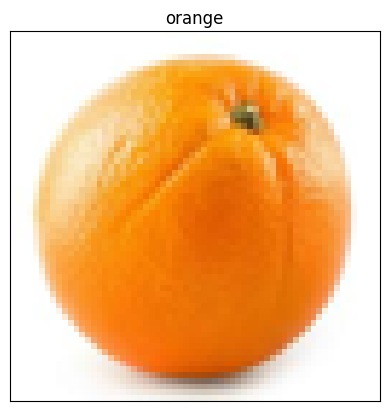

In [41]:
from PIL import Image
img1 = Image.open("./fruits/sample1.jpg")
img1 = img1.resize((64, 64))
plt.title(idx_cls[int(model.predict(np.array(img1).reshape(1, 64, 64, 3), verbose=0)[0][0])])
plt.xticks([])
plt.yticks([])
plt.imshow(img1);

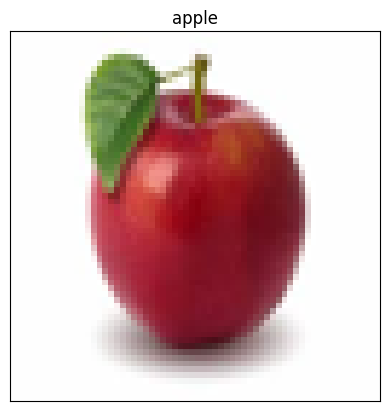

In [40]:
img2 = Image.open("./fruits/sample2.jpg")
img2 = img2.resize((64, 64))
plt.title(idx_cls[int(model.predict(np.array(img2).reshape(1, 64, 64, 3), verbose=0)[0][0])])
plt.xticks([])
plt.yticks([])
plt.imshow(img2);

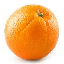

In [43]:
#loading image using keras
from keras.preprocessing.image import load_img, img_to_array
img1 = load_img("./fruits/sample1.jpg", target_size=(64, 64))
img1

In [45]:
from fastbook import *